In [1]:
import pandas as pd
import numpy as np

In [2]:
yield_df = pd.read_csv('yield.csv')

In [3]:
yield_df.head()

,Domain Code,Domain,Area Code,Area,Element Code,Element,Item Code,Item,Year Code,Year,Unit,Value
0,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1961,1961,hg/ha,14000
1,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1962,1962,hg/ha,14000
2,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1963,1963,hg/ha,14260
3,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1964,1964,hg/ha,14257
4,QC,Crops,2,Afghanistan,5419,Yield,56,Maize,1965,1965,hg/ha,14400


In [4]:
# We check the column names for any inconsistenicies in naming of columns.
yield_df.columns

Index(['Domain Code', 'Domain', 'Area Code', 'Area', 'Element Code', 'Element',
       'Item Code', 'Item', 'Year Code', 'Year', 'Unit', 'Value'],
      dtype='object')

In [5]:
# Here we replace column names of features Area to Country and Value to Yield Value
yield_df = yield_df.rename(columns={'Area':'Country', 'Value': 'Yield Value'})
print(yield_df.head())

  Domain Code Domain  Area Code      Country  Element Code Element  Item Code  \
0          QC  Crops          2  Afghanistan          5419   Yield         56   
1          QC  Crops          2  Afghanistan          5419   Yield         56   
2          QC  Crops          2  Afghanistan          5419   Yield         56   
3          QC  Crops          2  Afghanistan          5419   Yield         56   
4          QC  Crops          2  Afghanistan          5419   Yield         56   

    Item  Year Code  Year   Unit  Yield Value  
0  Maize       1961  1961  hg/ha        14000  
1  Maize       1962  1962  hg/ha        14000  
2  Maize       1963  1963  hg/ha        14260  
3  Maize       1964  1964  hg/ha        14257  
4  Maize       1965  1965  hg/ha        14400  


In [6]:
# We check for coumns which are not that important and drop them
# We see if the features have unique values. If not, that particular feature has not impact on target variable.So, we drop them

yield_df['Domain Code'].unique().sum()

'QC'

In [7]:
yield_df['Domain'].unique().sum()

'Crops'

In [8]:
yield_df['Area Code'].unique().sum()

27374

In [9]:
yield_df['Element Code'].unique().sum()

5419

In [10]:
yield_df['Element'].unique().sum()

'Yield'

In [11]:
yield_df['Item Code'].unique().sum()

1406

In [12]:
yield_df['Unit'].unique().sum()

'hg/ha'

In [13]:
yield_df = yield_df.drop(['Domain Code', 'Domain', 'Area Code', 'Element Code', 'Element', 'Item Code', 'Year Code', 'Unit'], axis=1)
yield_df.head()

,Country,Item,Year,Yield Value
0,Afghanistan,Maize,1961,14000
1,Afghanistan,Maize,1962,14000
2,Afghanistan,Maize,1963,14260
3,Afghanistan,Maize,1964,14257
4,Afghanistan,Maize,1965,14400


In [14]:
yield_df.isnull().sum()

Country        0
Item           0
Year           0
Yield Value    0
dtype: int64

In [15]:
yield_df.duplicated().sum()

0

In [16]:
rain_df = pd.read_csv('rainfall.csv')
print(rain_df.shape)

#Renaming columns
rain_df = rain_df.rename(columns={' Area':'Country'})
rain_df = rain_df.rename(columns={'average_rain_fall_mm_per_year':'rainfall_mm'})

# Checking for any null values in the dataframe
print(rain_df['Country'].isna().sum())
print(rain_df['Year'].isna().sum())
print(rain_df['rainfall_mm'].isna().sum())

print(rain_df.isnull().sum())

#Dropping NA rows in the DF based on rainfall_mm columns
rain_df = rain_df.dropna(subset=['rainfall_mm'])
rain_df.head()

(6727, 3)
0
0
774
Country          0
Year             0
rainfall_mm    774
dtype: int64


,Country,Year,rainfall_mm
0,Afghanistan,1985,327
1,Afghanistan,1986,327
2,Afghanistan,1987,327
3,Afghanistan,1989,327
4,Afghanistan,1990,327


(71311, 3)
0
0
2547
16.19301351528289
Year       0
Country    0
Temp       0
dtype: int64
(68737, 3)


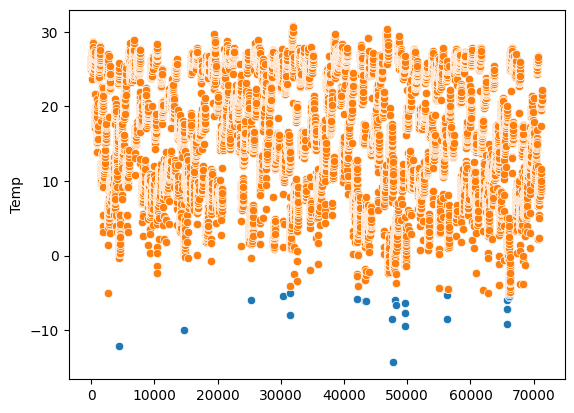

In [18]:
temp_df = pd.read_csv('temp.csv')
print(temp_df.shape)

#Renaming based on other dataframes 
temp_df = temp_df.rename(columns={'country':'Country'})
temp_df = temp_df.rename(columns={'year':'Year'})
temp_df = temp_df.rename(columns={'avg_temp':'Temp'})

#Checking for NA values
print(temp_df['Year'].isna().sum())
print(temp_df['Country'].isna().sum())
print(temp_df['Temp'].isna().sum())


#Visualizing for filtering outliers in temperature
import seaborn as sns
sns.scatterplot(temp_df['Temp'])

#Filtering outliers
temp_df = temp_df[temp_df["Temp"] > -5]
sns.scatterplot(temp_df['Temp'])

#Filling in mean values for temperature
temp_mean = temp_df['Temp'].mean()
print(temp_mean)
temp_df['Temp'].fillna(temp_mean, inplace=True)

#Checking if cleaned data has null values
print(temp_df.isnull().sum())

#print(temp_df_df.duplicated().sum())

temp_df.head()
print(temp_df.shape)

In [19]:
pest_df = pd.read_csv('pesticides.csv')
pest_df.head()

,Domain,Area,Element,Item,Year,Unit,Value
0,Pesticides Use,Albania,Use,Pesticides (total),1990,tonnes of active ingredients,121.0
1,Pesticides Use,Albania,Use,Pesticides (total),1991,tonnes of active ingredients,121.0
2,Pesticides Use,Albania,Use,Pesticides (total),1992,tonnes of active ingredients,121.0
3,Pesticides Use,Albania,Use,Pesticides (total),1993,tonnes of active ingredients,121.0
4,Pesticides Use,Albania,Use,Pesticides (total),1994,tonnes of active ingredients,201.0


In [20]:
# Checking for any inconsistencies in columns names
pest_df.columns

Index(['Domain', 'Area', 'Element', 'Item', 'Year', 'Unit', 'Value'], dtype='object')

In [21]:
# Replacing column names of features with inconsistent column names.  
pest_df = pest_df.rename(columns={'Area': 'Country', 'Value': 'PesticideTonnes'})

In [22]:
# Observe the columns which are not very useful. We also check if these columns have more than one unique values.

pest_df['Domain'].unique()

array(['Pesticides Use'], dtype=object)

In [23]:
pest_df['Element'].unique()

array(['Use'], dtype=object)

In [24]:
pest_df['Item'].unique()

array(['Pesticides (total)'], dtype=object)

In [25]:
pest_df['Unit'].unique()

array(['tonnes of active ingredients'], dtype=object)

In [26]:
# Dropping the columns which are not useful and if there are no unique values associated.

pest_df = pest_df.drop(['Domain', 'Element', 'Item','Unit'], axis=1)
pest_df.head()

,Country,Year,PesticideTonnes
0,Albania,1990,121.0
1,Albania,1991,121.0
2,Albania,1992,121.0
3,Albania,1993,121.0
4,Albania,1994,201.0


In [27]:
pest_df.isnull().sum()

Country            0
Year               0
PesticideTonnes    0
dtype: int64

In [28]:
print(pest_df.isnull().sum())

Country            0
Year               0
PesticideTonnes    0
dtype: int64


In [29]:
#Merging the dataframes  yield_df, rain_df, temp_df, pest_df by taking columns Year and Counrty as base. 
combined_df = yield_df.merge(rain_df, on=['Year','Country']).merge(temp_df, on=['Year','Country']).merge(pest_df, on=['Year','Country'])

In [30]:
print(combined_df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 28248 entries, 0 to 28247
Data columns (total 7 columns):
 #   Column           Non-Null Count  Dtype  
---  ------           --------------  -----  
 0   Country          28248 non-null  object 
 1   Item             28248 non-null  object 
 2   Year             28248 non-null  int64  
 3   Yield Value      28248 non-null  int64  
 4   rainfall_mm      28248 non-null  object 
 5   Temp             28248 non-null  float64
 6   PesticideTonnes  28248 non-null  float64
dtypes: float64(2), int64(2), object(3)
memory usage: 1.5+ MB
None


In [31]:
combined_df['rainfall_mm']  = pd.to_numeric(combined_df['rainfall_mm'], errors = 'coerce', downcast = 'float')

In [32]:
combined_df.shape

(28248, 7)

In [33]:
combined_df['Country'].unique()

array(['Albania', 'Algeria', 'Angola', 'Argentina', 'Armenia',
       'Australia', 'Austria', 'Azerbaijan', 'Bahamas', 'Bahrain',
       'Bangladesh', 'Belarus', 'Belgium', 'Botswana', 'Brazil',
       'Bulgaria', 'Burkina Faso', 'Burundi', 'Cameroon', 'Canada',
       'Central African Republic', 'Chile', 'Colombia', 'Croatia',
       'Denmark', 'Dominican Republic', 'Ecuador', 'Egypt', 'El Salvador',
       'Eritrea', 'Estonia', 'Finland', 'France', 'Germany', 'Ghana',
       'Greece', 'Guatemala', 'Guinea', 'Guyana', 'Haiti', 'Honduras',
       'Hungary', 'India', 'Indonesia', 'Iraq', 'Ireland', 'Italy',
       'Jamaica', 'Japan', 'Kazakhstan', 'Kenya', 'Latvia', 'Lebanon',
       'Lesotho', 'Libya', 'Lithuania', 'Madagascar', 'Malawi',
       'Malaysia', 'Mali', 'Mauritania', 'Mauritius', 'Mexico',
       'Montenegro', 'Morocco', 'Mozambique', 'Namibia', 'Nepal',
       'Netherlands', 'New Zealand', 'Nicaragua', 'Niger', 'Norway',
       'Pakistan', 'Papua New Guinea', 'Peru', 'Pola

In [34]:
combined_df['Year'].unique()
combined_df['Year'].nunique()

23

In [35]:
combined_df.groupby(['Country'],sort=True)['Yield Value'].sum().nlargest(15)

Country
India             327420324
Brazil            167550306
Mexico            130788528
Japan             124470912
Australia         109111062
Pakistan           73897434
Indonesia          69193506
United Kingdom     55419990
Turkey             52263950
Spain              46773540
South Africa       41333132
Germany            38780463
Egypt              36828848
Canada             34706922
Argentina          32864032
Name: Yield Value, dtype: int64

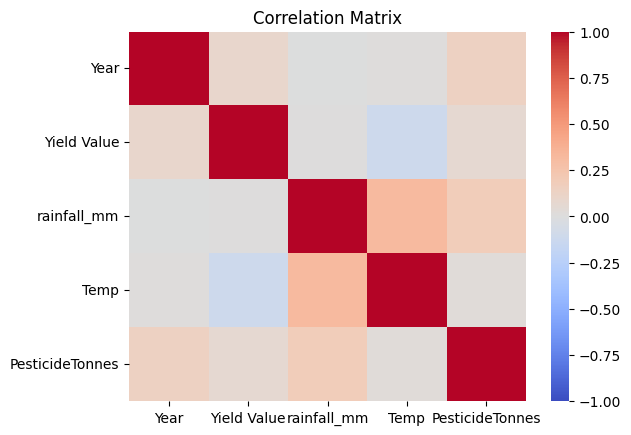

In [36]:
# Plotting correlation between columns

import seaborn as sns
import matplotlib.pyplot as plt

numerical_col = combined_df.select_dtypes(include = [np.number]).columns
corrMatrix = combined_df[numerical_col].corr()
sns.heatmap(corrMatrix, cmap = 'coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Matrix")
plt.show()


In [37]:
plt.figure()
sns.heatmap(combined_df.corr(),annot=True)

ValueError: could not convert string to float: 'Albania'

<Figure size 640x480 with 0 Axes>

In [ ]:
# Plotting scatter graph between Yield Value and Temperature

x = combined_df['Yield Value']
y = combined_df['Temp']

plt.scatter(x,y)

plt.xlabel('Feature: Temp')
plt.ylabel('Target: Yield Value')
plt.title('Scatter Graph')
plt.show()

In [ ]:
# Plotting scatter graph between Yield Value and Rainfall

x = combined_df['Yield Value']
y = combined_df['rainfall_mm']

plt.scatter(x,y)

plt.xlabel('Feature: Rain')
plt.ylabel('Target: Yield Value')
plt.title('Scatter Graph')
plt.show()

In [ ]:
# Plotting scatter graph between Yield Value and Pesticide

x = combined_df['Yield Value']
y = combined_df['PesticideTonnes']

plt.scatter(x,y)

plt.xlabel('Feature: Pesticide')
plt.ylabel('Target: Yield Value')
plt.title('Scatter Graph')
plt.show()

In [ ]:
# Plotting scatter graph between Rain fall and Temperature

x = combined_df['Temp']
y = combined_df['rainfall_mm']

plt.scatter(x,y)

plt.xlabel('Rainfall in mm')
plt.ylabel('Temp')
plt.title('Correlation')
plt.show()

In [ ]:
import matplotlib.pyplot as plt


grouped_df = combined_df.groupby(['Year'])
mean_temp = grouped_df['Temp'].mean()

plt.plot(mean_temp.index, mean_temp)

plt.title('Temperature by year')
plt.xlabel('Year')
plt.ylabel('Temperature C')

plt.show()

In [ ]:
grouped_df = combined_df.groupby(['Year'])

mean_yield_by_year = grouped_df['Yield Value'].mean()

plt.plot(mean_yield_by_year.index, mean_yield_by_year)

plt.title('Mean Yield by Year')
plt.xlabel('Year')
plt.ylabel('Mean Yield hg/ha')

plt.show()

In [ ]:
# We need to convert columns with catogerical data type into numerical data type. We are using one hot encoding for this purpose.
yield_df_1hot = pd.get_dummies(combined_df, columns=['Country', 'Item'])
yield_df_1hot.head()

In [ ]:
yield_df_1hot.shape

In [ ]:
label_df = yield_df_1hot['Yield Value']
feature_df =yield_df_1hot.drop(['Yield Value'], axis=1)

In [ ]:
feature_df.head()
label_df.head()

In [ ]:
from sklearn.preprocessing import MinMaxScaler

sc = MinMaxScaler()
feature_df = pd.DataFrame(sc.fit_transform(feature_df), columns = feature_df.columns)
feature_df.head()

In [ ]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(feature_df, label_df, test_size=0.2, random_state=42)
